In [19]:
## DESCRIPTION
# meteo_temperature_AA_boxplotBias_cells_rea-kr11
# meteo_temperature_AA_boxplotBias_cells_rea-kr11_*

In [20]:
import sys

lib_dir = "/home/daniele/documents/github/ftt01/phd/share/lib"
sys.path.insert( 0, lib_dir )

In [21]:
from lib import *

In [22]:
wdir = "/home/daniele/documents/github/ftt01/phd/projects/era5_evaluation/"
current = DataCollector(configPath=wdir + "etc/conf/")

In [23]:
## SETUP
basin = 'AA'
# for output name
basin_str = 'alto_adige'

start_date_str = "2010-01-01T00:00:00"
end_date_str = "2019-12-31T23:00:00"
start_date = dt.datetime.strptime( start_date_str, '%Y-%m-%dT%H:%M:%S' )
end_date = dt.datetime.strptime( end_date_str, '%Y-%m-%dT%H:%M:%S' )

In [28]:
## REANALYSIS DATASET ##
temperature_rea_path = "/media/lacie2022/data/GFS_models/ECMWF/ERA5Land-reanalysis/derivatives/t2m/"

list_of_cells = []
temperature_df_rea = pd.DataFrame()

t_file_tot = glob.glob( temperature_rea_path + '*.csv' )

for t_file in t_file_tot:
    data_tot = pd.read_csv(t_file,index_col=0,parse_dates=True,skiprows=4,names=[ os.path.basename(t_file)[:-4] ])
    data_tot=data_tot[start_date:end_date]
    data_tot[data_tot == -999] = None
    temperature_df_rea=pd.concat([temperature_df_rea, data_tot],axis=1)
    list_of_cells.append(os.path.basename(t_file)[:-4])

# spatial mean over all cells
# temperature_rea_spatial_mean = temperature_df_rea.mean(axis=1)

# # temporal mean over all cells
# temperature_df_rea_temporal_mean = temperature_df_rea.mean(axis=0)
# # temporal ECDF
# temperature_df_rea_temporal_ecdf = evaluateECDF( temperature_df_rea_temporal_mean )

In [25]:
# season=temperature_df_rea.groupby(temperature_df_rea.index.month).mean()
# season[season == 0] = None

In [30]:
## KRIGING 11X8 DATASET ##
temperature_kr11_path = "/media/windows/projects/era5_bias/kriging/old/kriging/AltoAdige/TMEAN/"
         
temperature_df_kr11 = pd.DataFrame()

t_file_tot = glob.glob( temperature_kr11_path + '*.csv')

for t_file in t_file_tot:
    if os.path.basename(t_file)[:-4] in list_of_cells:
        data_tot = pd.read_csv(t_file,index_col=0,parse_dates=True,skiprows=4,names=[ os.path.basename(t_file)[:-4] ])
        data_tot = data_tot[start_date:end_date]
        data_tot[data_tot == -999] = None
        temperature_df_kr11 = pd.concat([temperature_df_kr11, data_tot],axis=1)

# spatial mean over all cells
# temperature_kr11_spatial_mean = temperature_df_kr11.mean(axis=1)

# # temporal mean over all cells
# temperature_df_kr11_temporal_mean = temperature_df_kr11.mean(axis=0)
# # temporal ECDF
# temperature_df_kr11_temporal_ecdf = evaluateECDF( temperature_df_kr11_temporal_mean )

Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here


In [31]:
# spatial mean over all cells
temperature_rea_spatial_mean = temperature_df_rea.mean(axis=1)
# spatial mean over all cells
temperature_kr11_spatial_mean = temperature_df_kr11.mean(axis=1)

In [32]:
#### statistics over cells
temperature_bias = temperature_df_rea - temperature_df_kr11

### temperature bias mean for each year - spatial mean
# print( temperature_bias.mean(axis=1).describe() )

### extrapolation of data to build the maps
## 1. extraction of the grid 11x8km
## 2. temporal mean over the entire dataset - mean of all years over each cell

pathout = "/media/windows/projects/era5_bias/OLD/comparison/basin_comparison/"
diff_t_elev = pd.read_csv(pathout+'diff_media_temporale_t2m.csv',index_col=0)
diff_t_elev.drop('12', axis=1, inplace=True)
diff_t_elev.drop(169, inplace=True)

grid_11_8_coordinates = diff_t_elev

In [34]:
grid_11_8_coordinates

,east,north,z
ID,,,
105,658093.5,5198902.5,2559.429141
106,665790.5,5198902.5,2333.867914
107,673487.5,5198902.5,2045.288226
108,681184.5,5198902.5,1743.044340
109,688881.5,5198902.5,1912.521175
...,...,...,...
87,704275.5,5209767.5,2279.822955
88,711972.5,5209767.5,2126.865523
89,719669.5,5209767.5,2162.147704


In [11]:
## yearly temporal mean bias
data = grid_11_8_coordinates
bias = []
for id in grid_11_8_coordinates.index:
    # print(id)
    bias.append( temperature_bias.mean(axis=0)[str(id)] )

data['bias'] = bias

output_dir = current.config["output_path"] + "meteo/" + basin_str + "/temperature/" + "/yearly/"
mkNestedDir( output_dir )
data.to_csv( output_dir + "meteo_temperature_" + basin_str + "_yearly_temporal_mean_cells" + ".csv" ) 

KeyError: '105'

In [41]:
## seasonal temporal mean bias
data = grid_11_8_coordinates

temperature_bias_jan = temperature_bias.loc[(temperature_bias.index.month==1)].mean(axis=0)
temperature_bias_feb = temperature_bias.loc[(temperature_bias.index.month==2)].mean(axis=0)
temperature_bias_mar = temperature_bias.loc[(temperature_bias.index.month==3)].mean(axis=0)
temperature_bias_apr = temperature_bias.loc[(temperature_bias.index.month==4)].mean(axis=0)
temperature_bias_may = temperature_bias.loc[(temperature_bias.index.month==5)].mean(axis=0)
temperature_bias_jun = temperature_bias.loc[(temperature_bias.index.month==6)].mean(axis=0)
temperature_bias_jul = temperature_bias.loc[(temperature_bias.index.month==7)].mean(axis=0)
temperature_bias_aug = temperature_bias.loc[(temperature_bias.index.month==8)].mean(axis=0)
temperature_bias_sep = temperature_bias.loc[(temperature_bias.index.month==9)].mean(axis=0)
temperature_bias_oct = temperature_bias.loc[(temperature_bias.index.month==10)].mean(axis=0)
temperature_bias_nov = temperature_bias.loc[(temperature_bias.index.month==11)].mean(axis=0)
temperature_bias_dec = temperature_bias.loc[(temperature_bias.index.month==12)].mean(axis=0)

temperature_bias_w=pd.concat([temperature_bias_dec,temperature_bias_jan,temperature_bias_feb])
temperature_bias_sp=pd.concat([temperature_bias_mar,temperature_bias_apr,temperature_bias_may])
temperature_bias_su=pd.concat([temperature_bias_jun,temperature_bias_jul,temperature_bias_aug])
temperature_bias_a=pd.concat([temperature_bias_sep,temperature_bias_oct,temperature_bias_nov])

temperature_bias_winter_values = []
temperature_bias_spring_values = []
temperature_bias_summer_values = []
temperature_bias_autumn_values = []

for id in grid_11_8_coordinates.index:
    temperature_bias_winter_values.append( temperature_bias_w[id] )
    temperature_bias_spring_values.append( temperature_bias_sp[id] )
    temperature_bias_summer_values.append( temperature_bias_su[id] )
    temperature_bias_autumn_values.append( temperature_bias_a[id] )

data['bias_w'] = temperature_bias_winter_values
data['bias_sp'] = temperature_bias_spring_values
data['bias_su'] = temperature_bias_summer_values
data['bias_a'] = temperature_bias_autumn_values

output_dir = current.config["output_path"] + "meteo/" + basin_str + "/temperature/" + "/monthly/"
mkNestedDir( output_dir )
data.to_csv( output_dir + "meteo_temperature_" + basin_str + "_seasonal_temporal_mean_cells" + ".csv" )

In [42]:
data.describe()

,east,north,z,bias,bias_w,bias_sp,bias_su,bias_a
count,102.000000,1.020000e+02,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,684052.009804,5.176746e+06,1894.168283,-2.058969,-3.187389,-2.194817,-1.155912,-1.418977
std,40985.988409,1.939506e+04,395.257183,1.583902,1.590634,1.800426,1.728499,1.453771
min,604214.500000,5.133712e+06,834.885081,-8.013358,-8.219989,-6.615084,-5.812672,-5.185034
25%,652320.750000,5.166308e+06,1663.965348,-3.069711,-4.088350,-3.360840,-2.168911,-2.285372
50%,688881.500000,5.177172e+06,1880.298143,-1.965798,-2.892928,-2.203141,-1.231880,-1.320840
75%,719669.500000,5.188038e+06,2123.500460,-0.996892,-2.022221,-1.080698,-0.289940,-0.512215
max,750457.500000,5.220632e+06,2871.462302,1.246753,-0.365658,2.178324,3.862733,2.091220


In [43]:
# boxplot monthly bias
temperature_bias = temperature_rea_spatial_mean - temperature_kr11_spatial_mean
temperature_bias_monthly_sum = temperature_bias.resample('MS').mean()

output_path = current.config["output_path"] +  "meteo/" + basin_str + "/temperature/" + "/monthly/" + "meteo_temperature_" + basin_str + "_monthly_spatial_mean_cells_boxplot_rea-kr11." + output_format 

createBoxPlot( temperature_bias_monthly_sum,  "Time $[month]$", "Temp. bias $[\degree C]$", output_path, label="(d)", period='MS', output_format=output_format, scale_factor=0.65, my_dpi=50 )

output_path_hd = current.config["output_path"] + "meteo/" + basin_str + "/temperature/" + "/monthly/" + "meteo_temperature_" + basin_str + "_monthly_spatial_mean_cells_boxplot_rea-kr11_HD." + output_format 

createBoxPlot( temperature_bias_monthly_sum,  "Time $[month]$", "Temp. bias $[\degree C]$", output_path_hd, label="(d)", period='MS', output_format=output_format, scale_factor=0.65, my_dpi=600)

In [44]:
## statistics on monthly data
temperature_bias = temperature_rea_spatial_mean - temperature_kr11_spatial_mean
temperature_bias_monthly_mean = temperature_bias.resample('MS').mean()

#-------------------boxplot seasonal--------------------     
temperature_bias_monthly_mean_jan=temperature_bias_monthly_mean.loc[(temperature_bias_monthly_mean.index.month==1)]
temperature_bias_monthly_mean_feb=temperature_bias_monthly_mean.loc[(temperature_bias_monthly_mean.index.month==2)]
temperature_bias_monthly_mean_mar=temperature_bias_monthly_mean.loc[(temperature_bias_monthly_mean.index.month==3)]
temperature_bias_monthly_mean_apr=temperature_bias_monthly_mean.loc[(temperature_bias_monthly_mean.index.month==4)]
temperature_bias_monthly_mean_may=temperature_bias_monthly_mean.loc[(temperature_bias_monthly_mean.index.month==5)]
temperature_bias_monthly_mean_jun=temperature_bias_monthly_mean.loc[(temperature_bias_monthly_mean.index.month==6)]
temperature_bias_monthly_mean_jul=temperature_bias_monthly_mean.loc[(temperature_bias_monthly_mean.index.month==7)]
temperature_bias_monthly_mean_aug=temperature_bias_monthly_mean.loc[(temperature_bias_monthly_mean.index.month==8)]
temperature_bias_monthly_mean_sep=temperature_bias_monthly_mean.loc[(temperature_bias_monthly_mean.index.month==9)]
temperature_bias_monthly_mean_oct=temperature_bias_monthly_mean.loc[(temperature_bias_monthly_mean.index.month==10)]
temperature_bias_monthly_mean_nov=temperature_bias_monthly_mean.loc[(temperature_bias_monthly_mean.index.month==11)]
temperature_bias_monthly_mean_dec=temperature_bias_monthly_mean.loc[(temperature_bias_monthly_mean.index.month==12)]

# print( temperature_bias_monthly_mean_jan.describe() )
# print( temperature_bias_monthly_mean_feb.describe() )
# print( temperature_bias_monthly_mean_mar.describe() )
# print( temperature_bias_monthly_mean_apr.describe() )
# print( temperature_bias_monthly_mean_may.describe() )
# print( temperature_bias_monthly_mean_jun.describe() )
# print( temperature_bias_monthly_mean_jul.describe() )
# print( temperature_bias_monthly_mean_aug.describe() )
# print( temperature_bias_monthly_mean_sep.describe() )
# print( temperature_bias_monthly_mean_oct.describe() )
# print( temperature_bias_monthly_mean_nov.describe() )
# print( temperature_bias_monthly_mean_dec.describe() )
##
# print( temperature_bias_monthly_mean.describe() )

In [45]:
temperature_bias

2010-01-01 00:00:00   -4.600262
2010-01-01 01:00:00   -5.043972
2010-01-01 02:00:00   -5.548647
2010-01-01 03:00:00   -5.653382
2010-01-01 04:00:00   -5.748416
                         ...   
2019-12-31 19:00:00   -6.648474
2019-12-31 20:00:00   -6.933107
2019-12-31 21:00:00   -7.114970
2019-12-31 22:00:00   -7.176149
2019-12-31 23:00:00   -7.180697
Length: 87648, dtype: float64

In [46]:
# boxplot hourly bias
temperature_bias = temperature_rea_spatial_mean - temperature_kr11_spatial_mean

output_path = current.config["output_path"] +  "meteo/" + basin_str + "/temperature/" + "/hourly/" + "meteo_temperature_" + basin_str + "_hourly_spatial_mean_cells_boxplot_rea-kr11." + output_format 

createBoxPlot( temperature_bias,  "Time $[hour]$", "Temp. bias $[\degree C]$", output_path, label="(d)", period='MS', output_format=output_format, my_dpi=50 )

output_path_hd = current.config["output_path"] + "meteo/" + basin_str + "/temperature/" + "/hourly/" + "meteo_temperature_" + basin_str + "_hourly_spatial_mean_cells_boxplot_rea-kr11_HD." + output_format 

createBoxPlot( temperature_bias,  "Time $[hour]$", "Temp. bias $[\degree C]$",  output_path_hd, label="(d)", period='MS', output_format=output_format, my_dpi=600)

In [47]:
# spatial ECDF - hourly
temperature_rea_spatial_ecdf = evaluateECDF( temperature_rea_spatial_mean )
temperature_kr11_spatial_ecdf = evaluateECDF( temperature_kr11_spatial_mean )

plots = []

plt_conf = {}
plt_conf["label"] = "KR11x8"
plt_conf["color"] = '#5e3c99'
plots.append( (temperature_kr11_spatial_ecdf, plt_conf) )

plt_conf = {}
plt_conf["label"] = "REA11x8"
plt_conf["color"] = '#e66101'
plots.append( (temperature_rea_spatial_ecdf, plt_conf) )

output_file = current.config["output_path"] + "meteo/alto_adige/temperature/hourly/meteo_" + 'temperature_AA_hourly_spatialECDF.' + output_format
createPlot( plots, "Temperature $[\degree C]$", "ECDF", output_file, \
    xticks=[-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30], x_rot=45, yticks=[0,10,20,30,40,50,60,70,80,90,100], label="(c)", \
    height=160, scale_factor=0.35, bbox_to_anchor=None, my_dpi=50)

output_file_hd = current.config["output_path"] + "meteo/alto_adige/temperature/hourly/meteo_" + 'temperature_AA_hourly_spatialECDF_HD.' + output_format
createPlot( plots, "Temperature $[\degree C]$", "ECDF", output_file_hd, \
    xticks=[-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30], x_rot=35, yticks=[0,10,20,30,40,50,60,70,80,90,100], label="(c)", \
    height=160, scale_factor=0.35, bbox_to_anchor=None, my_dpi=600)

output_file = current.config["output_path"] + "meteo/alto_adige/temperature/hourly/meteo_" + 'temperature_AA_hourly_spatialECDF_log.' + output_format
createPlot( plots, "Temperature $[\degree C]$", "ECDF", output_file, \
    xticks=[-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30], x_rot=35, yticks=[0,10,20,30,40,50,60,70,80,90,100], label="(c)", \
    xscale='log', height=160, scale_factor=0.35, bbox_to_anchor=None, my_dpi=50)

output_file_hd = current.config["output_path"] + "meteo/alto_adige/temperature/hourly/meteo_" + 'temperature_AA_hourly_spatialECDF_log_HD.' + output_format
createPlot( plots, "Temperature $[\degree C]$", "ECDF", output_file_hd, \
    xticks=[-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30], x_rot=35, yticks=[0,10,20,30,40,50,60,70,80,90,100], label="(c)", \
    xscale='log', height=160, scale_factor=0.35, bbox_to_anchor=None, my_dpi=600)

In [48]:
rea = temperature_rea_spatial_ecdf
kr = temperature_kr11_spatial_ecdf
bias_min = np.array(rea.loc[(rea['cdf'] <= 5)].index).mean() - np.array(kr.loc[(kr['cdf'] <= 5)].index).mean()
print(bias_min)

-4.474645705826433


In [49]:
rea = temperature_rea_spatial_ecdf
kr = temperature_kr11_spatial_ecdf
bias_median = np.array(rea.loc[(rea['cdf'] >= 49.5) & (rea['cdf'] <= 50.5)].index).mean() - np.array(kr.loc[(kr['cdf'] >= 49.5) & (kr['cdf'] <= 50.5)].index).mean()
print(bias_median)

-1.9558427756065888


In [50]:
rea = temperature_rea_spatial_ecdf
kr = temperature_kr11_spatial_ecdf
bias_max = np.array(rea.loc[(rea['cdf'] >= 95)].index).mean() - np.array(kr.loc[(kr['cdf'] >= 95)].index).mean()
print(bias_max)

-1.378827857508739


In [51]:
# spatial ECDF - monthly
temperature_rea_spatial_ecdf = evaluateECDF( temperature_rea_spatial_mean.resample('MS').mean() )
temperature_kr11_spatial_ecdf = evaluateECDF( temperature_kr11_spatial_mean.resample('MS').mean() )

plots = []

plt_conf = {}
plt_conf["label"] = "KR11x8"
plt_conf["color"] = '#5e3c99'
plots.append( (temperature_kr11_spatial_ecdf, plt_conf) )

plt_conf = {}
plt_conf["label"] = "REA11x8"
plt_conf["color"] = '#e66101'
plots.append( (temperature_rea_spatial_ecdf, plt_conf) )

output_file = current.config["output_path"] + "meteo/alto_adige/temperature/monthly/meteo_" + 'temperature_AA_monthly_spatialECDF.' + output_format
createPlot( plots, "Temperature $[\degree C]$", "ECDF", output_file, \
    scale_factor=0.5, my_dpi=50)

output_file_hd = current.config["output_path"] + "meteo/alto_adige/temperature/monthly/meteo_" + 'temperature_AA_monthly_spatialECDF_HD.' + output_format
createPlot( plots, "Temperature $[\degree C]$", "ECDF", output_file_hd, \
    scale_factor=0.5, my_dpi=600)

output_file = current.config["output_path"] + "meteo/alto_adige/temperature/monthly/meteo_" + 'temperature_AA_monthly_spatialECDF_log.' + output_format
createPlot( plots, "Temperature $[\degree C]$", "ECDF", output_file, \
    xscale='log', scale_factor=0.5, my_dpi=50)

output_file_hd = current.config["output_path"] + "meteo/alto_adige/temperature/monthly/meteo_" + 'temperature_AA_monthly_spatialECDF_log_HD.' + output_format
createPlot( plots, "Temperature $[\degree C]$", "ECDF", output_file_hd, \
    xscale='log', scale_factor=0.5, my_dpi=600)

In [52]:
temperature_bias = temperature_rea_spatial_mean - temperature_kr11_spatial_mean

#-------------------boxplot seasonal--------------------     
temperature_bias_jan=temperature_bias.loc[(temperature_bias.index.month==1)]
temperature_bias_feb=temperature_bias.loc[(temperature_bias.index.month==2)]
temperature_bias_mar=temperature_bias.loc[(temperature_bias.index.month==3)]
temperature_bias_apr=temperature_bias.loc[(temperature_bias.index.month==4)]
temperature_bias_may=temperature_bias.loc[(temperature_bias.index.month==5)]
temperature_bias_jun=temperature_bias.loc[(temperature_bias.index.month==6)]
temperature_bias_jul=temperature_bias.loc[(temperature_bias.index.month==7)]
temperature_bias_aug=temperature_bias.loc[(temperature_bias.index.month==8)]
temperature_bias_sep=temperature_bias.loc[(temperature_bias.index.month==9)]
temperature_bias_oct=temperature_bias.loc[(temperature_bias.index.month==10)]
temperature_bias_nov=temperature_bias.loc[(temperature_bias.index.month==11)]
temperature_bias_dec=temperature_bias.loc[(temperature_bias.index.month==12)]

temperature_bias_w=pd.concat([temperature_bias_jan,temperature_bias_feb,temperature_bias_mar])
temperature_bias_sp=pd.concat([temperature_bias_apr,temperature_bias_may,temperature_bias_jun])
temperature_bias_su=pd.concat([temperature_bias_jul,temperature_bias_aug,temperature_bias_sep])
temperature_bias_a=pd.concat([temperature_bias_oct,temperature_bias_nov,temperature_bias_dec])

output_file = current.config["output_path"] +  "meteo/" + basin_str + "/temperature/" + "/hourly/seasonal/" + 'meteo_temperature_' + basin_str + '_hourly_boxplot_spatial_mean_cells_rea-kr11_winter.' + output_format
createBoxPlot( temperature_bias_w, "Time $[hour]$", "Temp. bias $[\degree C]$", \
    output_file, output_format=output_format, period="H", scale_factor=0.5, my_dpi=50 )

output_file_hd = current.config["output_path"] +  "meteo/" + basin_str + "/temperature/" + "/hourly/seasonal/" + 'meteo_temperature_' + basin_str + '_hourly_boxplot_spatial_mean_cells_rea-kr11_winter_HD.' + output_format
createBoxPlot( temperature_bias_w, "Time $[hour]$", "Temp. bias $[\degree C]$", \
    output_file_hd, output_format=output_format, period="H", scale_factor=0.5, my_dpi=600 )

output_file = current.config["output_path"] +  "meteo/" + basin_str + "/temperature/" + "/hourly/seasonal/" + 'meteo_temperature_' + basin_str + '_hourly_boxplot_spatial_mean_cells_rea-kr11_spring.' + output_format
createBoxPlot( temperature_bias_sp, "Time $[hour]$", "Temp. bias $[\degree C]$", \
    output_file, output_format=output_format, period="H", scale_factor=0.5, my_dpi=50 )

output_file_hd = current.config["output_path"] +  "meteo/" + basin_str + "/temperature/" + "/hourly/seasonal/" + 'meteo_temperature_' + basin_str + '_hourly_boxplot_spatial_mean_cells_rea-kr11_spring_HD.' + output_format
createBoxPlot( temperature_bias_sp, "Time $[hour]$", "Temp. bias $[\degree C]$", \
    output_file_hd, output_format=output_format, period="H", scale_factor=0.5, my_dpi=600 )

output_file = current.config["output_path"] +  "meteo/" + basin_str + "/temperature/" + "/hourly/seasonal/" + 'meteo_temperature_' + basin_str + '_hourly_boxplot_spatial_mean_cells_rea-kr11_summer.' + output_format
createBoxPlot( temperature_bias_su, "Time $[hour]$", "Temp. bias $[\degree C]$", \
    output_file, output_format=output_format, period="H", scale_factor=0.5, my_dpi=50 )

output_file_hd = current.config["output_path"] +  "meteo/" + basin_str + "/temperature/" + "/hourly/seasonal/" + 'meteo_temperature_' + basin_str + '_hourly_boxplot_spatial_mean_cells_rea-kr11_summer_HD.' + output_format
createBoxPlot( temperature_bias_su, "Time $[hour]$", "Temp. bias $[\degree C]$", \
    output_file_hd, output_format=output_format, period="H", scale_factor=0.5, my_dpi=600 )

output_file = current.config["output_path"] + "meteo/" + basin_str + "/temperature/" + "/hourly/seasonal/" + 'meteo_temperature_' + basin_str + '_hourly_boxplot_spatial_mean_cells_rea-kr11_autumn.' + output_format
createBoxPlot( temperature_bias_a, "Time $[hour]$", "Temp. bias $[\degree C]$", \
    output_file, output_format=output_format, period="H", scale_factor=0.5, my_dpi=50 )

output_file_hd = current.config["output_path"] +  "meteo/" + basin_str + "/temperature/" + "/hourly/seasonal/" + 'meteo_temperature_' + basin_str + '_hourly_boxplot_spatial_mean_cells_rea-kr11_autumn_HD.' + output_format
createBoxPlot( temperature_bias_a, "Time $[hour]$", "Temp. bias $[\degree C]$", \
    output_file_hd, output_format=output_format, period="H", scale_factor=0.5, my_dpi=600 )

In [53]:
temperature_bias = temperature_df_rea - temperature_df_kr11

In [54]:
el = "/media/windows/projects/era5_bias/OLD/comparison/data/ecmwf/ECMWF_grid_Adige_river.csv"
tmp = pd.read_csv( el )
tmp.set_index( "ID", inplace=True )

In [55]:
bias_df = pd.DataFrame( temperature_bias.resample('Y').mean().mean(), columns=['bias'] )

In [56]:
elev = []
bias = []

for i in bias_df.index:
    # print(i)
    elev.append( tmp.loc[int(i)]['Elev'] )
    bias.append( bias_df.loc[str(i)].values[0] )

In [57]:
data = pd.DataFrame(elev, columns=['elevation'])
data['bias'] = bias

In [58]:
data[data['elevation']==-999] = None
data.dropna(inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


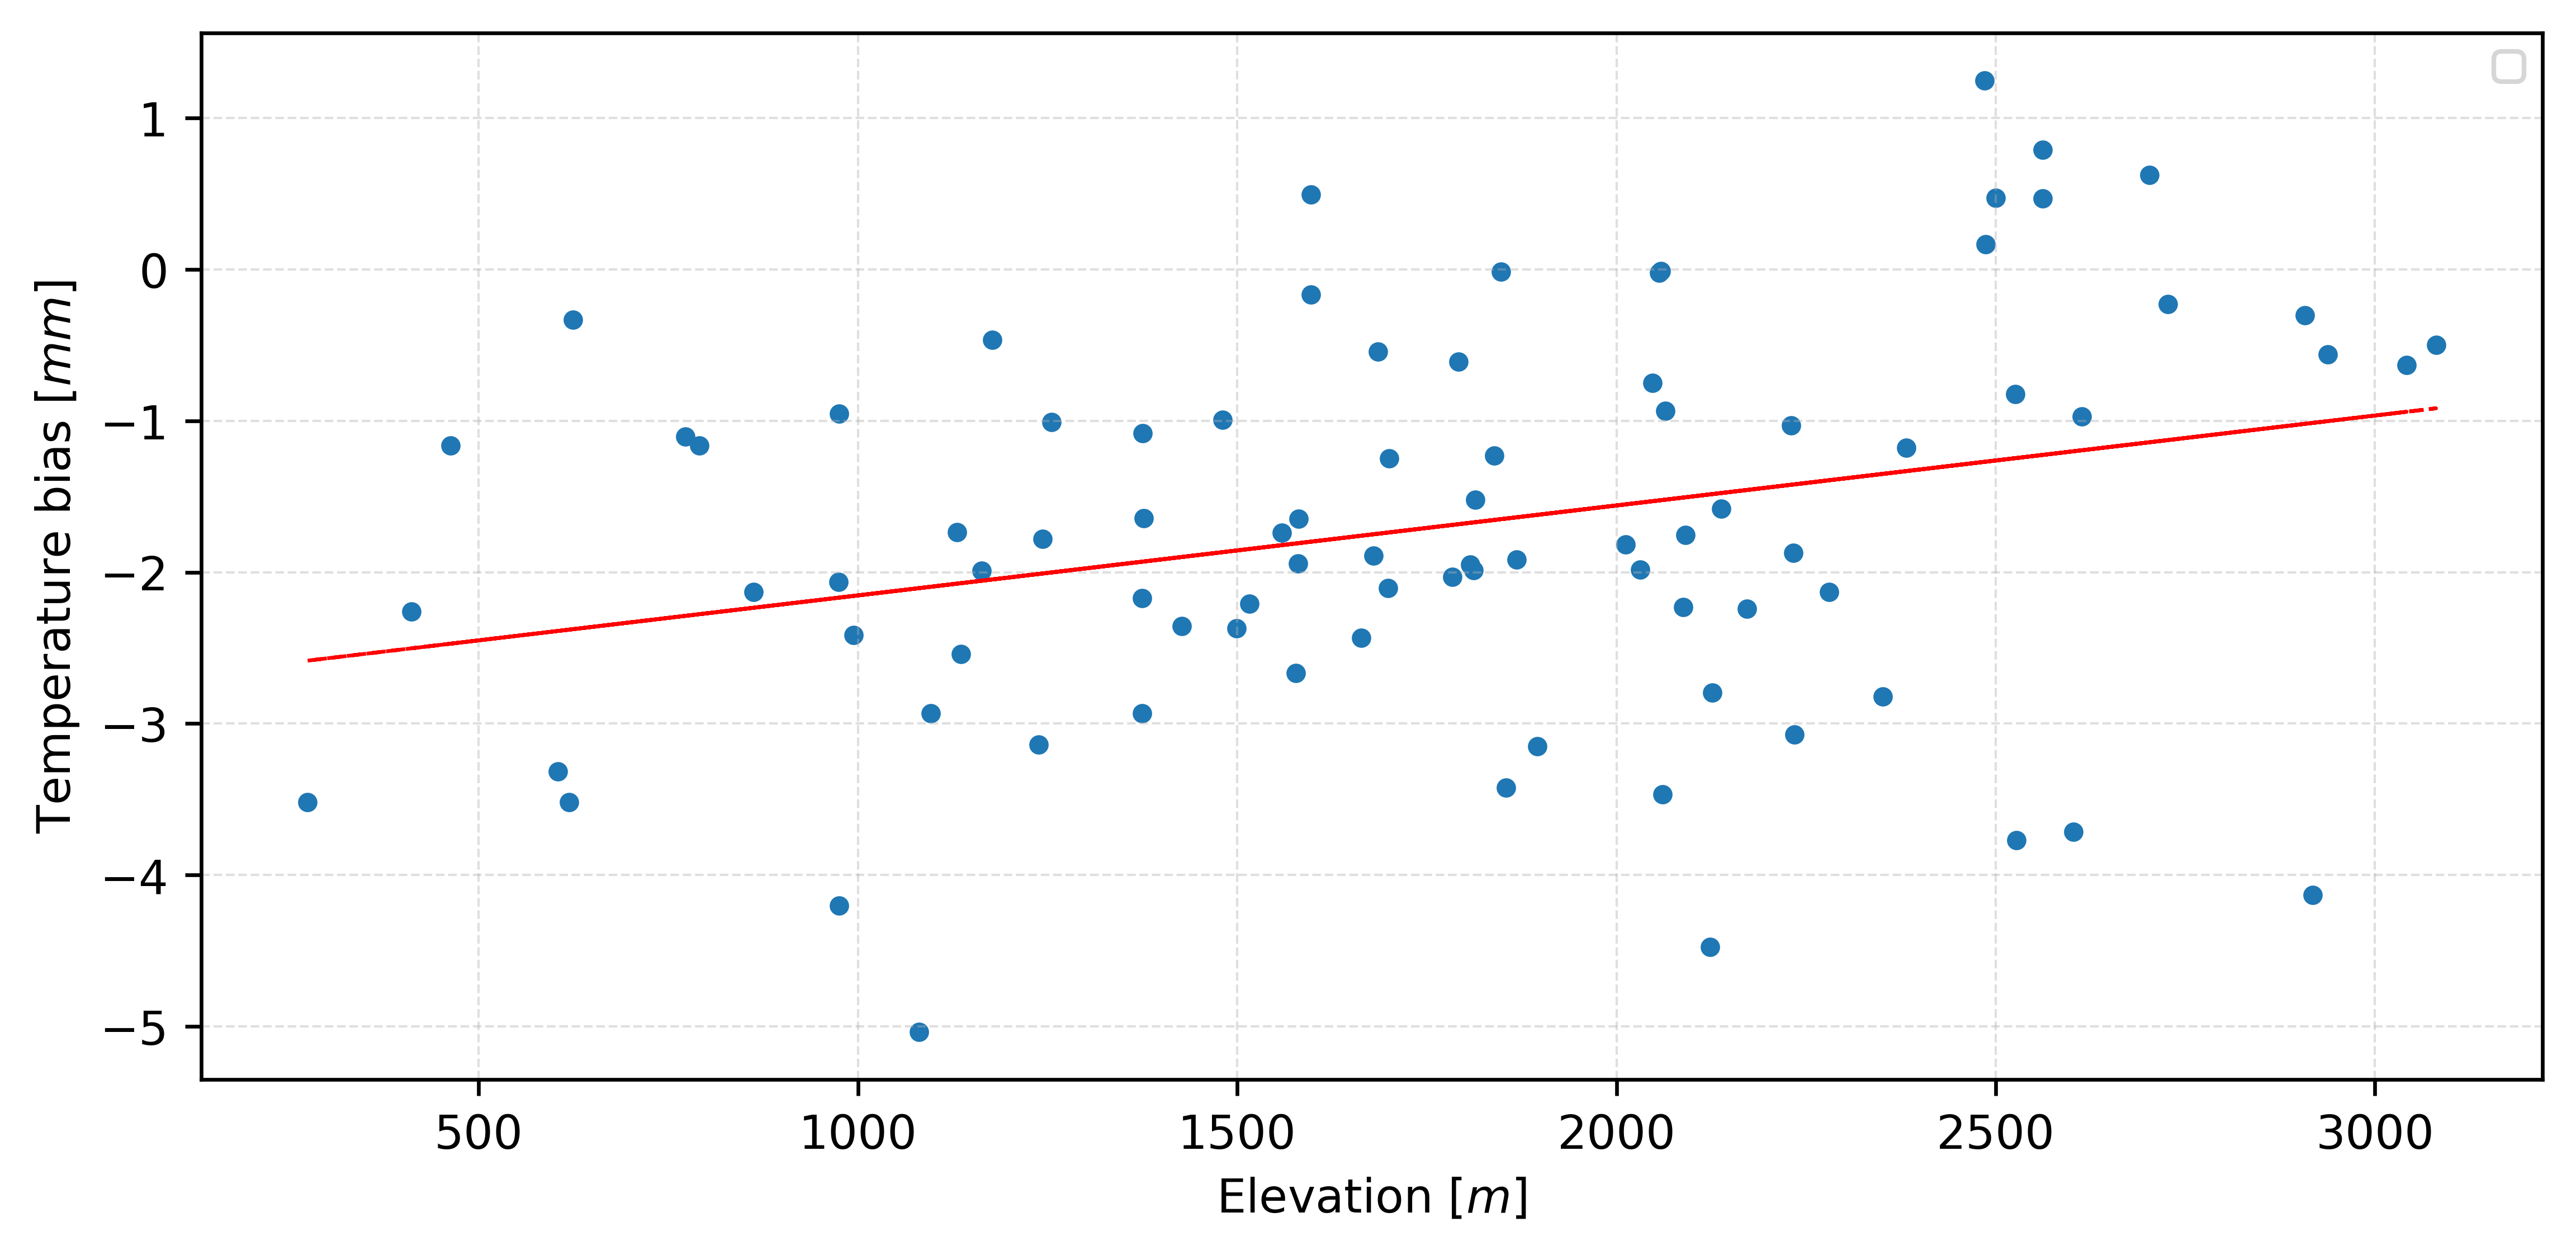

In [78]:
fig, axs = instantiatePlot( "Elevation $[m]$", "Temperature bias $[mm]$" )

axs.scatter( data['elevation'], data['bias'], s=10 )

# import pingouin as pg
# mod = pg.linear_regression(data['elevation'],data['bias'])

z1 = np.polyfit( data['elevation'], data['bias'], 1 )
p1 = np.poly1d(z1)
axs.plot( np.array(data['elevation']), p1(data['elevation']), "r--" )

output_file = current.config["output_path"] +  "meteo/" + basin_str + "/temperature/" + "/yearly/meteo_" + 'temperature_AA_yearly_elevation_bias.' + output_format
mkNestedDir(getPathFromFilepath(output_file))
fig.savefig( output_file, format=output_format, bbox_inches='tight', facecolor='w', dpi=50 )

output_file_hd = current.config["output_path"] +  "meteo/" + basin_str + "/temperature/" + "/yearly/meteo_" + 'temperature_AA_yearly_elevation_bias_HD.' + output_format
mkNestedDir(getPathFromFilepath(output_file_hd))
fig.savefig( output_file_hd, format=output_format, bbox_inches='tight', facecolor='w', dpi=600 ) 

In [81]:
import pingouin as pg
mod = pg.linear_regression(data['elevation'], data['bias'])
mod.round(6)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-2.747311,0.383107,-7.171126,0.000000,0.091803,0.080992,-3.509162,-1.985460
1,elevation,0.000594,0.000204,2.913930,0.004573,0.091803,0.080992,0.000189,0.000999
